## Задача 3

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot
from sklearn.decomposition import PCA
import scipy as sp
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


### Загрузим 6000 элементов обучающей выборки:

In [3]:
X = (np.loadtxt('hard_train.txt'))[:6000]
y = (np.loadtxt('hard_train_labels.txt'))[:6000]

### Применим t-SNE:

In [4]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

Сохраним, чтобы не пришлось перезапускать обучение:

In [5]:
np.savetxt('hard_train_tsne_6000.txt', X_tsne, fmt = '%.3f', delimiter = ',')

### Визуализируем точки, взяв в качестве цвета метку класса точки:

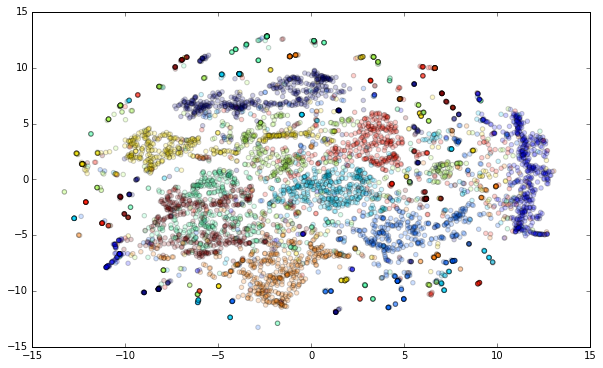

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.2)
plt.show()

### Разобьем выборку в отношении 5:1, обучим на первой kNN с дефолтными параметрами и посчитаем accuracy по второй части: 

In [7]:
X_train = X[:5000]
X_test = X[5000:]

y_train = y[:5000]
y_test = y[5000:]

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
print "Accuracy:", accuracy

Accuracy: 0.861
